#### Problem :
Scipy:

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

c:\python\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '0+unknown' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months = np.arange(12)

In [3]:
def solve(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

residual_max, covariance_max = optimize.curve_fit(solve, months,Max, [40, 20, 0])
residual_min, covariance_min = optimize.curve_fit(solve, months,Min, [-40, 20, 0])

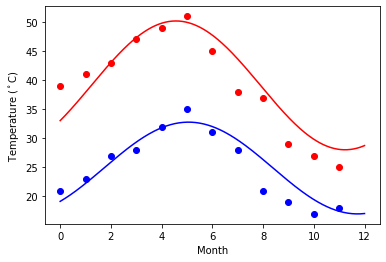

In [4]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, solve(days, *residual_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, solve(days, *residual_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

#### Problem:

Matplotlib:
    
This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [6]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


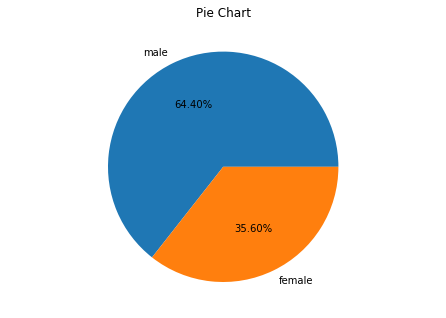

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sex = ['male','female']
ax.pie(titanic.sex.value_counts(), labels=sex,autopct='%1.2f%%')
plt.title('Pie Chart')
plt.show()

<Figure size 432x288 with 0 Axes>

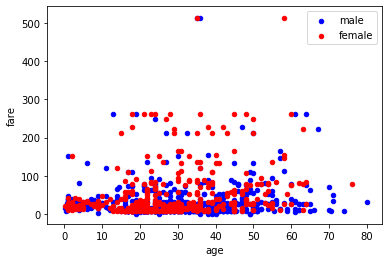

In [8]:
plt.figure()
result = titanic[titanic.sex=='male'].plot.scatter('age', 'fare', color='blue',label='male') 
titanic[titanic.sex=='female'].plot.scatter('age', 'fare',color='red',label='female',ax=result)